# Module 3 : Performance measurements of Logistic regression

In [1]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = pd.read_csv("data.csv")

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')

In [6]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [7]:
X = df.drop(labels='Result', axis=1)
#Response variable
y = df.loc[:,'Result'] 
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [8]:
 #We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Logistic Regression :

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logR= LogisticRegression()

logR.fit(X_train,y_train)

predictR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictR))

print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")

accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

          -1       0.82      0.91      0.86       211
           0       0.56      0.16      0.25        31
           1       0.81      0.82      0.81       164

    accuracy                           0.81       406
   macro avg       0.73      0.63      0.64       406
weighted avg       0.80      0.81      0.80       406


Confusion Matrix result of Logistic Regression is:
 [[191   1  19]
 [ 14   5  12]
 [ 27   3 134]]

Sensitivity :  0.9947916666666666

Specificity :  0.2631578947368421

Cross validation test results of accuracy:
[0.79335793 0.82287823 0.8302583  0.84814815 0.84814815]

Accuracy result of Logistic Regression is: 82.85581522481891


In [10]:
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="Logistic Regression"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison ",fontsize=15)
    plt.legend(b,data,fontsize=9)

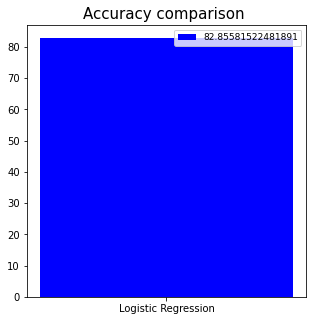

In [11]:
graph()

In [12]:
TP = cm[0][0]
FP = cm[1][0]
FN = cm[1][1]
TN = cm[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 191
True Negative : 1
False Positive : 14
False Negative : 5

True Positive Rate : 0.9744897959183674
True Negative Rate : 0.06666666666666667
False Positive Rate : 0.9333333333333333
False Negative Rate : 0.025510204081632654

Positive Predictive Value : 0.9317073170731708
Negative predictive value : 0.16666666666666666


Confusion matrix-LogisticRegression:
[[191   1  19]
 [ 14   5  12]
 [ 27   3 134]]


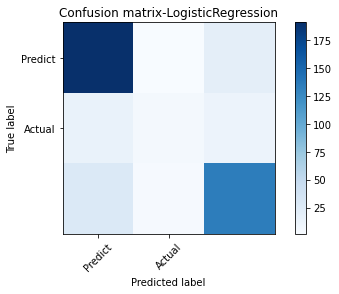

In [13]:
def plot_confusion_matrix(cm2, title='Confusion matrix-LogisticRegression', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-LogisticRegression:')
print(cm2)
plot_confusion_matrix(cm2)